In [1]:
import pandas as pd
import numpy as np
import os
import glob

In [2]:
import tensorflow as tf
tf.__version__

2024-04-14 17:22:44.160120: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-14 17:22:45.336723: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


'2.16.1'

In [3]:

def prepare():
    
    path = 'classification-of-defects-in-a-rotary-machine/train'
    csv_files = glob.glob(os.path.join(path, "*.csv")) 
    
    data = []
   
    for f in csv_files: 
                
            label = f.split('/')[2].split('.')[0][-1]
            df = pd.read_csv(f)
            
            a = np.array_split(df.iloc[:,1], 1000)
                
            for j in range(0,1000):
                    
                data.append(
                        
                    [np.array(a[j][:600], dtype=np.float64),
                    np.int32(label)]

                )
       
            
    df = pd.DataFrame(data, columns=['TS','label'])

    df = df.sample(frac = 1)

    return df
        
        
   
    


In [4]:
df = pd.DataFrame(prepare(), columns=['TS','label'])
#print(df.iloc[8030,:])

/home/abolfazl/Desktop/DeepLearning_Research (copy)/venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/abolfazl/Desktop/DeepLearning_Research (copy)/venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/abolfazl/Desktop/DeepLearning_Research (copy)/venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/abolfazl/Desktop/DeepLearning_Research (copy)/venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be remove

In [5]:
df

,TS,label
19671,"[6.509, 6.677, 6.548, 6.635, 6.584, 6.624, 6.6...",3
6713,"[6.568, 6.555, 6.509, 6.547, 6.474, 6.493, 6.4...",3
11017,"[6.566, 6.636, 6.644, 6.615, 6.657, 6.68, 6.64...",2
16817,"[6.57, 6.572, 6.529, 6.497, 6.521, 6.571, 6.57...",3
15441,"[6.542, 6.478, 6.481, 6.49, 6.442, 6.494, 6.48...",4
...,...,...
3374,"[6.48, 6.484, 6.406, 6.384, 6.413, 6.353, 6.37...",2
10237,"[6.597, 6.622, 6.62, 6.577, 6.586, 6.627, 6.60...",2
11762,"[6.662, 6.708, 6.754, 6.767, 6.704, 6.75, 6.57...",2
11914,"[6.6, 6.534, 6.56, 6.516, 6.484, 6.527, 6.491,...",2


In [6]:
np.array(df['TS'].to_list())[:,tf.newaxis,:].shape

(28000, 1, 600)

In [7]:
x = np.array(df['TS'].to_list())



In [8]:
x[:,np.newaxis,:].shape

(28000, 1, 600)

In [9]:
len(x[1000])

600

In [10]:
x

array([[6.509, 6.677, 6.548, ..., 6.671, 6.625, 6.588],
       [6.568, 6.555, 6.509, ..., 6.423, 6.45 , 6.441],
       [6.566, 6.636, 6.644, ..., 6.645, 6.651, 6.617],
       ...,
       [6.662, 6.708, 6.754, ..., 6.582, 6.526, 6.551],
       [6.6  , 6.534, 6.56 , ..., 6.683, 6.623, 6.649],
       [6.525, 6.533, 6.482, ..., 6.422, 6.376, 6.356]])

In [11]:
x[:,np.newaxis,:].shape

(28000, 1, 600)

In [12]:
y = np.array(df['label'].to_list())

In [13]:
from keras.utils import to_categorical

to_categorical(y,num_classes=5)

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]])

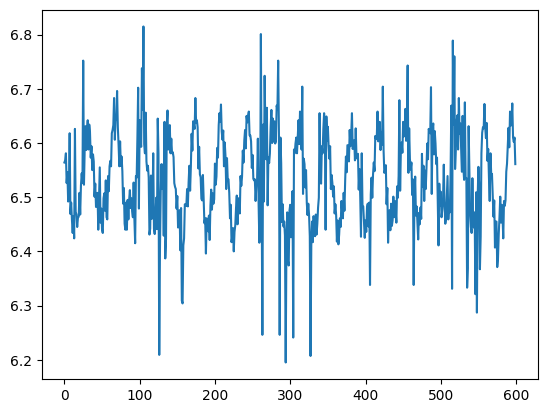

In [15]:
import matplotlib.pyplot as plt

plt.plot(x[100])
plt.show()
